#Blake Thomas 
Fall 2023

The columns are the following:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)


---
This notebook is based on:
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb

## Housing Price Machine Learning Model 


In [48]:
#Import Modules
import pandas as pd
#import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load the dataset


This is a dataset that provides [housing information for the state of California](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv).



In [47]:
## Part 1

#import the dataset.
training_df = pd.read_csv(filepath_or_buffer="/Users/blakethomas/Desktop/MLproj/train.csv")

#scale the label.
training_df["Id"] /= 1000.0

#print the first rows of the pandas DataFrame.
training_df.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Price
0,0.8,78,1.0,6,6,1974,0.7,0.0,1.0,1.3,...,1,5,1,2,0.5,2.6,0.0,0.0,1,1.8
1,0.7,49,2.1,8,5,2005,1.7,0.4,2.1,2.1,...,1,8,1,3,1.1,1.9,2.7,0.0,1,4.2
2,0.3,118,1.4,7,5,2001,0.0,1.5,1.5,1.5,...,1,6,1,3,0.8,4.7,0.8,0.0,1,2.0
3,0.1,78,1.2,7,5,2005,1.3,0.4,1.7,1.7,...,1,7,0,2,0.7,1.6,0.2,0.0,1,2.6
4,1.0,88,1.3,5,4,1957,0.2,0.3,1.1,1.8,...,1,8,1,2,0.5,0.0,0.0,0.0,1,1.6
5,0.4,100,3.5,5,5,1955,1.1,0.0,1.1,1.1,...,1,5,0,2,0.6,2.6,0.0,0.0,1,1.4
6,1.4,60,1.0,3,4,1915,0.0,0.7,0.7,0.7,...,1,6,0,3,0.9,2.2,0.0,1.6,1,1.1
7,0.2,85,1.1,6,6,1975,0.6,0.2,0.7,0.8,...,1,6,1,2,0.4,2.1,2.1,0.0,2,1.8
8,0.6,80,1.0,8,5,1992,0.8,0.1,0.9,0.9,...,1,8,1,2,0.5,1.2,1.5,0.0,2,2.2
9,0.9,65,1.4,7,5,2002,0.0,0.9,0.9,0.9,...,1,7,1,2,0.5,1.4,1.0,0.0,2,1.9


## Examine the dataset using Pandas to extract relevant information



In [4]:
#Question 2: Get statistics on the dataset.

#count the number of values
pricedata = training_df['Price'].describe()

nvals = len(training_df)

#mean value of price

meanp = pricedata['mean']

#min and Max Price
minp = pricedata['min']
maxp = pricedata['max']


#standard Deviation of Price
stdp = pricedata['std']

#print Data 
print(f"Number of records in the training set: {nvals}")
print(f"Mean of price: {meanp}")
print(f"Min price: {minp}")
print(f"Max price: {maxp}")
print(f"Standard deviation of price: {stdp}")


Number of records in the training set: 818
Mean of price: 1.8618897432762838
Min price: 0.35311
Max price: 7.55
Standard deviation of price: 0.8242982253562076


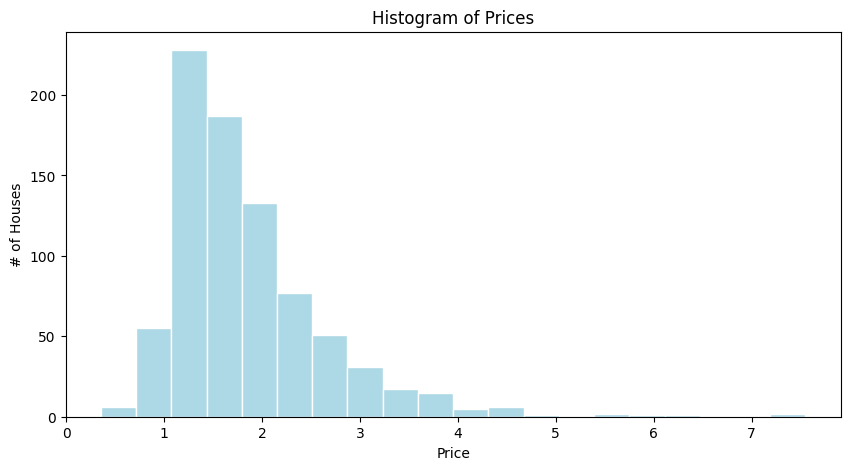

In [5]:
##Housing Price Histogram


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(training_df['Price'], bins=20, color='lightblue', edgecolor='white')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('# of Houses')
plt.show()


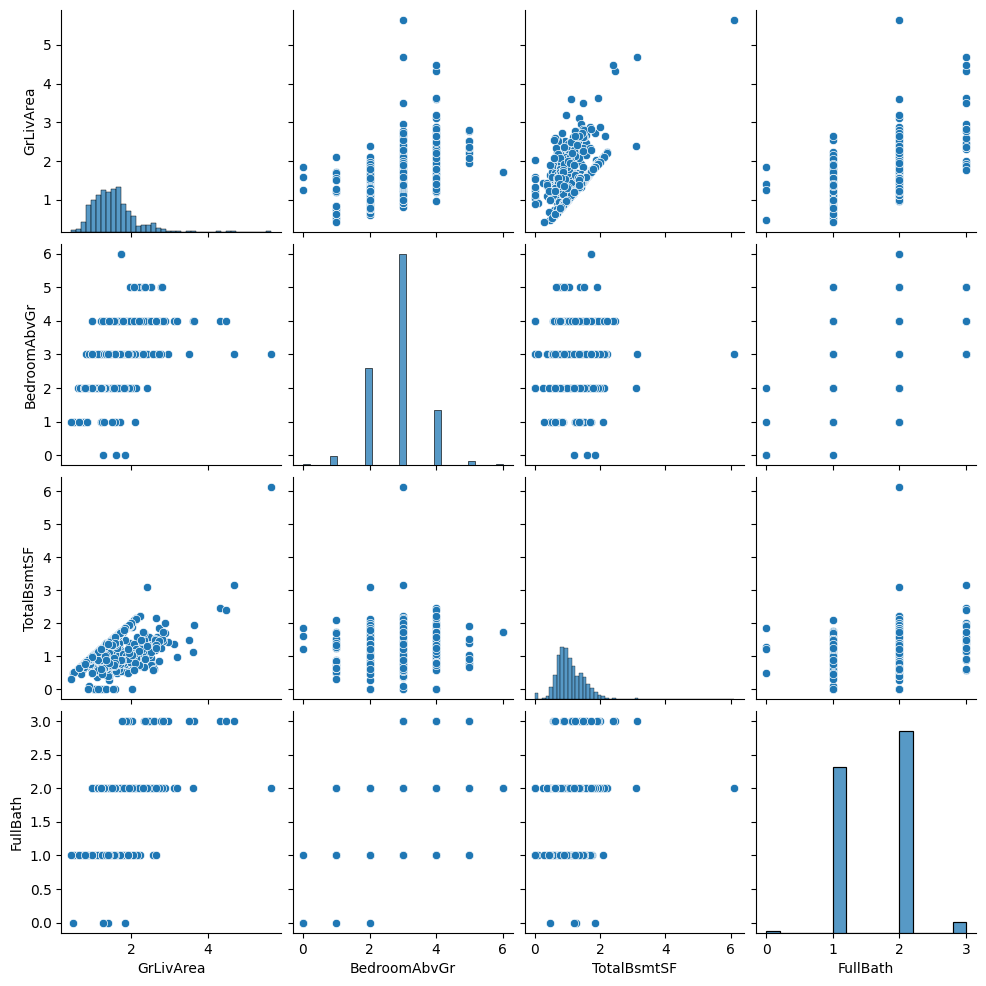

In [6]:
# Pairwise scatter plot to extract more insight

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'GrLivArea', 'BedroomAbvGr', 'TotalBsmtSF', 'FullBath' are the features of interest
selected_features = ['GrLivArea', 'BedroomAbvGr', 'TotalBsmtSF', 'FullBath']

# Extract the subset of the dataset with the selected features
selected_data = training_df[selected_features]

cols = ['GrLivArea', 'BedroomAbvGr', 'TotalBsmtSF', 'FullBath']
sns.pairplot(training_df[cols], height=2.5);
plt.show()

In [43]:
#Set Up Equations / Functions used in model

def pred(weights, features):

    """
    Inputs:  weights (array), features (array) 
    Outputs: Prediction (scalar)
    """

    #convert to NP arrays
    weights = np.array(weights)
    features = np.array(features)

    prediction = np.dot(weights, features)

    return prediction

def loss(predictions,actual_prices):
    
    """
    Inputs:  predictions, actuals prices (all arrays), 
    Outputs: MSE (scalar)

    """

    predictions = np.array(predictions)
    actual_prices = np.array(actual_prices)

    #calculate MSE
    mse = np.mean((predictions - actual_prices)**2)

    return mse


def gradient(features, predictions, actual_prices):

    """
    Inputs: features, predictions, actuals prices (all arrays), 
    Outputs: gradient (array)

    """
   
    #convert into numpy arrays 
    features = np.array(features)
    predictions = np.array(predictions)
    actual_prices = np.array(actual_prices)

    #calculate the gradient based on the given formula
    grad = 2 * np.dot(features.T, (predictions-actual_prices)) / len(actual_prices)
    

    return grad

def update(weights, learning_rate, grad):

    """
    Inputs: weights (array), learning rate (scalar), grad (array)

    Outputs: updated weights (array)

    """

    #ensure weights and gradient are arrays
    weights = np.array(weights)
    grad = np.array(grad)

    #update weights using gradient descent
    updated_weights = weights - learning_rate * grad

    return updated_weights

In [77]:
#Part 9, the ML algorithm

#algorithm
def housing_model(alpha,num_iterations):

    """
    Inputs: learning rate, iterations

    Outputs: list of MSE value for each iteration

    """

    #choose features (minus price) and create value array
    all_features = training_df.drop('Price', axis=1)

    X = all_features.values

    #set Y to price array
    Y = training_df['Price'].values

    #initialize weights with zeros
    weights = np.zeros(X.shape[1])
   

    #list to store MSE values and iterations (for plotting)
    mse_values = []

    #run algorithm for # of iterations
    for iteration in range(num_iterations):
        
        #make prediction for each house in dataset and add to one array
        predictions = np.array([pred(weights, house) for house in X])

        #calculate MSE
        mse = loss(predictions, Y)
        mse_values.append(mse)

        #calculate gradient
        grad = gradient(X, predictions, Y)

        #update weights
        weights = update(weights, alpha, grad)

    print("This untrained model produces an mse of:", mse, "after",num_iterations, "iterations")
    return mse_values,weights

In [52]:
#Function to plot MSE values for multiple runs
def plot_mse(iterations, mse_values, alpha_values):
    for i in range(len(mse_values)):
        mse = mse_values[i]
        alpha = alpha_values[i]
        plt.plot(iterations, mse, label=f'Alpha = {alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('MSE vs # of Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

/var/folders/11/01dk4lh918s9315ydb6jjktr0000gn/T/ipykernel_30399/3512019698.py:30: RuntimeWarning: overflow encountered in square
  mse = np.mean((predictions - actual_prices)**2)


This untrained model produces an mse of: nan after 500 iterations


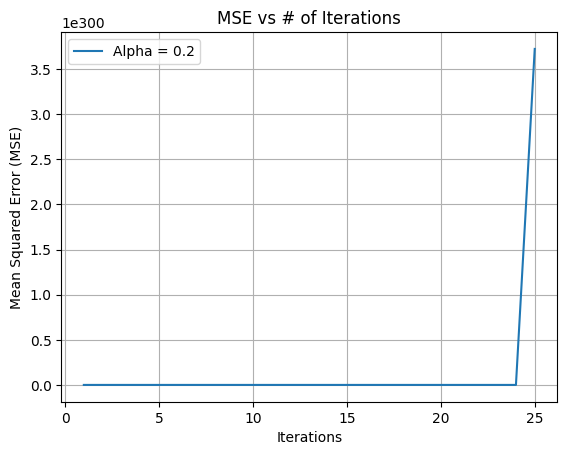

In [78]:
#Running the algorithm with a learning rate of .2

#run the model for a single alpha value
alpha1 = .2
num_iterations = 500

mse_values_alpha1 , trained_weights = housing_model(alpha1, num_iterations)

#plot the MSE values for alpha value
iterations = range(1, num_iterations + 1)
plot_mse(iterations, [mse_values_alpha1], [alpha1])

#

This untrained model produces an mse of: 0.6520927304437233 after 500 iterations
This untrained model produces an mse of: 0.6793272197652998 after 500 iterations


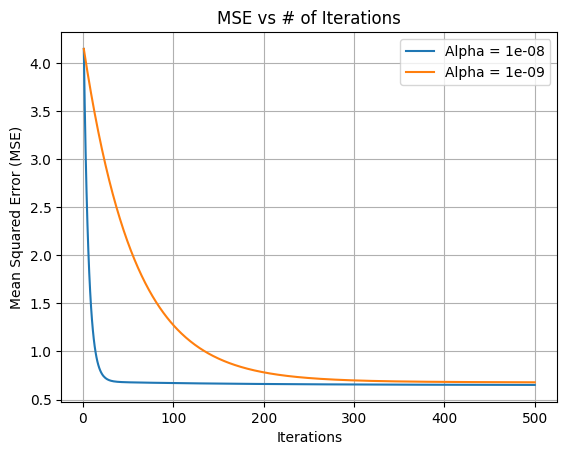

In [79]:
#Running the algorithm with a different learning rates

#run the model for different alpha values
alpha1 = 1e-8
alpha2 = 1e-9

mse_values_alpha1 , trained_weights = housing_model(alpha1, 500)
mse_values_alpha2 , trained_weights = housing_model(alpha2, 500)

iterations = range(1, 501)
plot_mse(iterations, [mse_values_alpha1, mse_values_alpha2], [alpha1, alpha2])


In [76]:
#Trying the test set

#import test set
testing_df = pd.read_csv(filepath_or_buffer="/Users/blakethomas/Desktop/ECE241/proj3/train.csv")

#run the model for a single alpha value
alpha1 = 1e-8
#num_iterations = 500

 #choose features (minus price) and create value array
all_features = testing_df.drop('Price', axis=1)

X = all_features.values

    #set Y to price array
Y = testing_df['Price'].values

    #initialize weights with random values (0-1) based on # of features 
weights = trained_weights
   

    #list to store MSE values and iterations (for plotting)
mse_values = []

#make prediction for each house in dataset and add to one array
predictions = np.array([pred(weights, house) for house in X])

#calculate MSE
mse = loss(predictions, Y)
mse_values.append(mse)

print("The trained model produces an mse of:", mse, "after 1 iteration")





The trained model produces an mse of: 0.6793015406826154 after 1 iteration
